In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import numpy as np

In [2]:
##########
# CCLE
##########
ccle = pd.read_csv("../data/CCLE_RNAseq_rsem_genes_tpm_20180929.txt.gz", sep="\t", engine='c')
ccle_data = ccle.iloc[:,2:]
ccle_data_log2 = np.log2(ccle_data + 1)
ccle_lineages = [x.split(sep="_", maxsplit=1)[1] for x in ccle.columns[2:].tolist()]

In [3]:
PCA_COMPONENTS=50
pca = PCA(n_components=PCA_COMPONENTS, svd_solver="full")

In [4]:
#Run PCA
ccle_pca = pca.fit_transform(ccle_data_log2.transpose())
ccle_pca_df = pd.DataFrame(data = ccle_pca)
ccle_pca_df['Lineage'] = ccle_lineages
ccle_pca_df['isHaem'] = ccle_pca_df['Lineage'] == 'HAEMATOPOIETIC_AND_LYMPHOID_TISSUE'

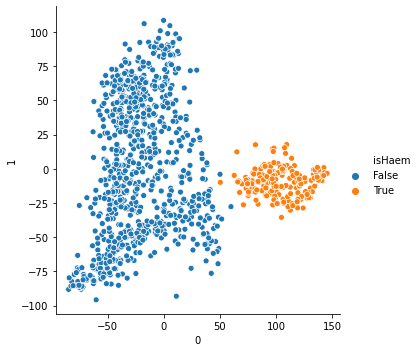

In [5]:
#Plot PCA
sns.relplot(x=0, y=1, data=ccle_pca_df, hue = "isHaem")

In [14]:
#CCLE TSNE
ccle_tsne_list = []
for PERPLEXITY in [50,30,10,5,3]:
    this_ccle_tsne = TSNE(n_components=2, perplexity=PERPLEXITY, random_state=10).fit_transform(ccle_pca)
    this_ccle_tsne_df = pd.DataFrame(data = this_ccle_tsne, columns=['tsne1','tsne2'])
    this_ccle_tsne_df['Lineage'] = ccle_lineages
    this_ccle_tsne_df['isHaem'] = this_ccle_tsne_df['Lineage'] == 'HAEMATOPOIETIC_AND_LYMPHOID_TISSUE'
    this_ccle_tsne_df['PERPLEXITY'] = PERPLEXITY
    ccle_tsne_list.append(this_ccle_tsne_df)
    
ccle_tsne_list_all = pd.concat(ccle_tsne_list, axis=0, ignore_index=True)

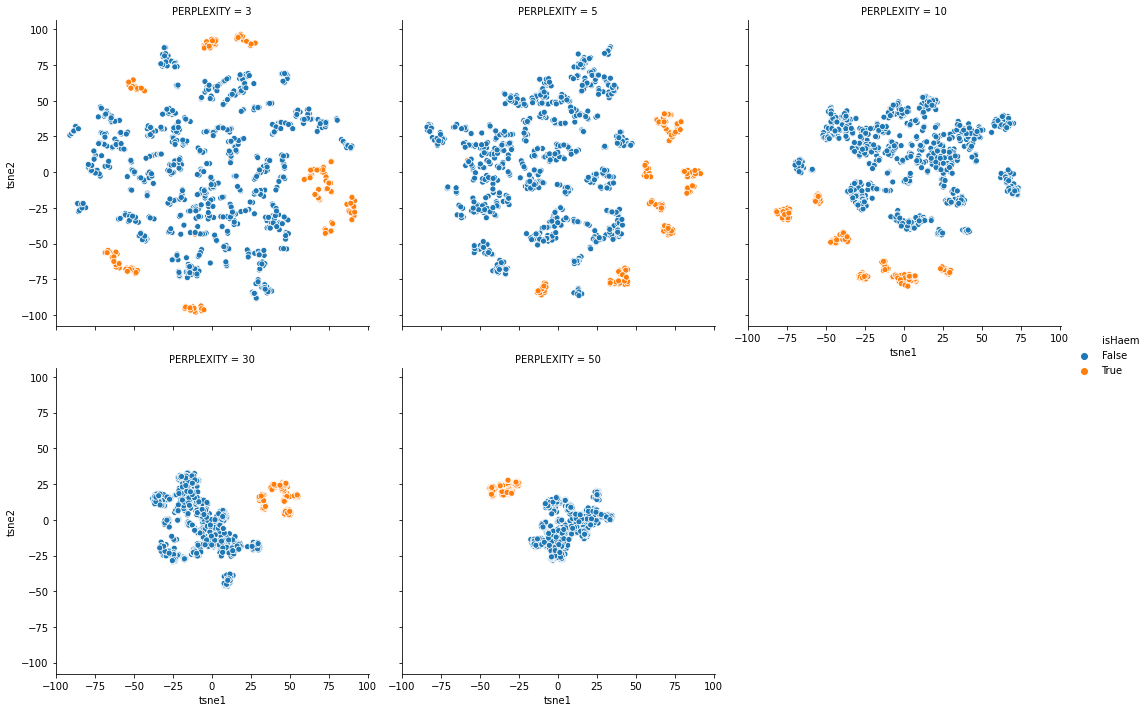

In [16]:
sns.relplot(x='tsne1', y='tsne2', data=ccle_tsne_list_all, hue = 'isHaem', col='PERPLEXITY', col_wrap=3)

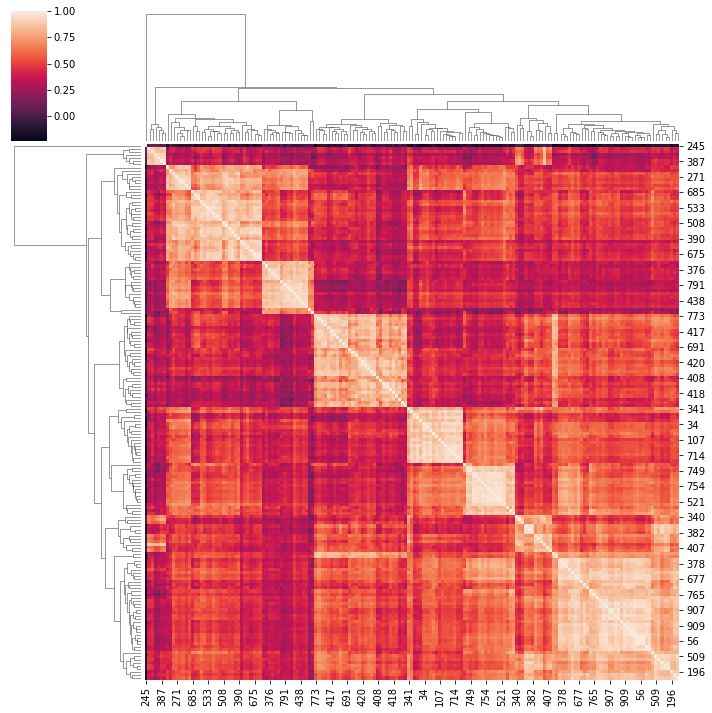

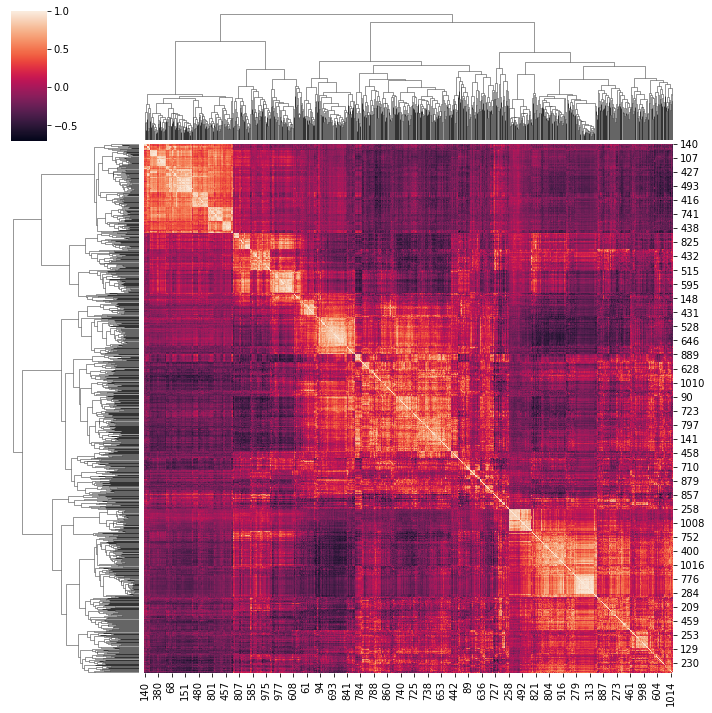

In [50]:
#make Haem cluster map
sns.clustermap(ccle_pca_df.loc[ccle_pca_df['isHaem'] == True,].iloc[:,0:49].transpose().corr())
#sns.clustermap(ccle_pca_df.iloc[:,0:49].transpose().corr())

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
9,106.323134,-22.156421,-20.970954,-2.563690,14.251809,-1.740411,-16.647626,5.274791,-19.595812,-0.586988,...,-2.161126,5.866459,10.903701,5.338972,-5.418040,0.625725,4.935054,-5.919702,0.524445,3.477430
23,79.366890,-3.131485,-15.356491,-6.490201,1.331764,15.253407,36.346755,-12.540095,34.367811,29.311480,...,15.106798,21.014380,-2.923388,-3.102299,-10.107616,-0.626122,2.667146,5.735564,1.298527,-6.909724
26,86.435208,0.032303,-22.458559,6.824591,-8.348618,-1.770283,28.397373,-13.432697,14.196534,25.688740,...,7.088685,9.312926,4.310119,0.085330,-4.601707,7.062606,13.552565,5.912745,11.599695,-1.159665
34,127.770370,-21.314257,-20.745960,34.450620,4.860793,-6.368819,-28.475234,9.365069,-13.822832,-1.891820,...,-6.224132,4.841352,-2.424178,-1.166938,1.709351,-1.414753,4.293406,7.930886,-5.250397,-2.751403
36,98.931204,-5.531997,-41.467828,33.652278,-17.195914,3.039260,-29.190939,39.524820,7.155838,-31.327306,...,-0.818039,-5.309296,-6.871884,7.986788,0.258618,6.320248,-2.117545,-5.366307,7.388140,1.891311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,75.595989,-16.898740,-21.930784,27.799552,-18.709658,10.499490,-26.619064,46.076183,10.695764,-33.948385,...,-2.226892,2.068178,3.152650,5.399069,-3.027140,-11.919504,16.107804,1.368234,-3.733294,-1.020777
968,127.757199,-18.688106,-15.129980,25.643955,3.689982,-22.151456,4.524627,-26.000087,-21.515652,22.237299,...,11.819281,12.792557,-9.002966,1.770807,-3.071496,-4.050024,4.405342,-2.945294,16.222978,-4.191530
985,82.941798,-15.388772,-9.583204,12.959586,-1.199217,-6.801463,49.316433,-31.506342,18.296239,32.335107,...,3.734630,-0.541271,-0.585470,15.059918,3.765694,-7.491767,9.029611,3.240661,-6.152344,5.570458
989,96.623212,-7.327858,-44.069654,8.784484,-20.246251,11.356646,-22.015429,40.782970,9.784945,-31.535469,...,-0.505035,-9.281665,-6.868051,2.435469,-2.334426,0.218205,4.360469,-2.915288,7.646498,-0.120303


In [29]:
ccle_pca_df

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,Lineage,isHaem
0,24.542683,17.935779,70.047607,-16.460685,-16.073626,-0.714963,-2.396118,-9.854999,0.770722,21.880701,...,1.288794,6.850855,6.619452,-1.915519,-5.082625,-7.921123,0.567950,0.582094,PROSTATE,False
1,-3.774013,82.230396,16.958752,-3.318483,-47.704981,5.006959,-8.959525,-15.961486,-9.550185,14.954165,...,-5.619463,12.334319,11.893369,1.401725,0.833658,-18.280376,10.922729,1.130520,STOMACH,False
2,-19.272007,0.233670,-8.801426,-23.077484,-5.919963,-28.883792,-6.351705,-14.681615,52.678181,-5.566379,...,6.069431,-4.703250,5.663746,3.859893,11.211886,16.061582,6.066813,3.361245,URINARY_TRACT,False
3,-22.178581,0.946332,-21.180546,-38.694938,3.447747,2.674914,1.715934,-9.007420,64.138387,-1.822656,...,1.116017,-4.327726,4.002115,0.664623,12.934206,12.830303,3.671326,3.274874,URINARY_TRACT,False
4,-42.809821,-73.087021,-25.081484,1.811629,3.717852,6.574688,-11.984521,-2.579033,-30.948751,8.068231,...,-6.059273,9.061708,21.033558,-3.940119,-8.604746,-6.489987,-10.454780,-17.822823,CENTRAL_NERVOUS_SYSTEM,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,-75.344491,-26.747553,-6.128860,59.293098,9.165189,0.637934,-6.055104,5.853584,4.623487,8.580406,...,-19.565948,-18.182456,5.561733,-14.230698,5.223400,4.124645,0.837846,-8.013989,UPPER_AERODIGESTIVE_TRACT,False
1015,-62.429806,-81.760881,-4.370268,42.361848,-10.312598,23.980719,-6.114399,-11.145362,-14.973472,7.730781,...,2.323024,-4.522146,18.567302,1.664508,1.694597,-1.919085,-4.770907,-9.741642,CENTRAL_NERVOUS_SYSTEM,False
1016,-38.888554,-69.121098,26.427163,10.795969,-22.845692,9.223863,4.915165,4.928811,4.349022,5.601767,...,0.799942,-4.049814,4.761902,-7.941043,12.703000,18.030098,5.140056,3.700551,CENTRAL_NERVOUS_SYSTEM,False
1017,3.253880,48.115386,52.460407,15.055341,-9.300172,21.096045,3.963984,19.863290,10.663574,50.404957,...,4.216283,-10.615480,0.844135,7.789701,-2.750096,5.444024,7.805722,-0.059346,BREAST,False


0       False
1       False
2       False
3       False
4       False
        ...  
1014    False
1015    False
1016    False
1017    False
1018    False
Name: isHaem, Length: 1019, dtype: bool

In [8]:
#Load TCGA Data
tcga_data = pd.read_csv('../data/TCGA_rnaseqv2_Level3_RSEM_Genes.txt.gz', sep='\t')
TUMOR_TYPE_LABELS = [x.split(sep="_", maxsplit=1)[1] for x in tcga_data.columns.tolist()]
tcga_data = np.log2(tcga_data + 1).transpose()

In [9]:
# Run PCA
tcga_pca = pca.fit_transform(tcga_data)
tcga_pca_df = pd.DataFrame(data = tcga_pca)

In [10]:
# tcga_pca_df['TUMOR_TYPE'] = tcga_lineages
# sns.relplot(x=0, y=1, data=tcga_pca_df, hue = 'TUMOR_TYPE')

In [11]:
#Run tSNE with different seeds
tcga_tsne_list = []
for SEED in [1,2,3,4]:
    this_tcga_tsne = TSNE(n_components=2, perplexity=50, random_state=SEED).fit_transform(tcga_pca_df)
    this_tcga_tsne_df = pd.DataFrame(data = this_tcga_tsne, columns=['tsne1','tsne2'])
    this_tcga_tsne_df['TUMOR_TYPE'] = TUMOR_TYPE_LABELS
    this_tcga_tsne_df['SEED'] = SEED
    tcga_tsne_list.append(this_tcga_tsne_df)
    
tcga_data_tsne_all = pd.concat(tcga_tsne_list, axis=0, ignore_index=True)

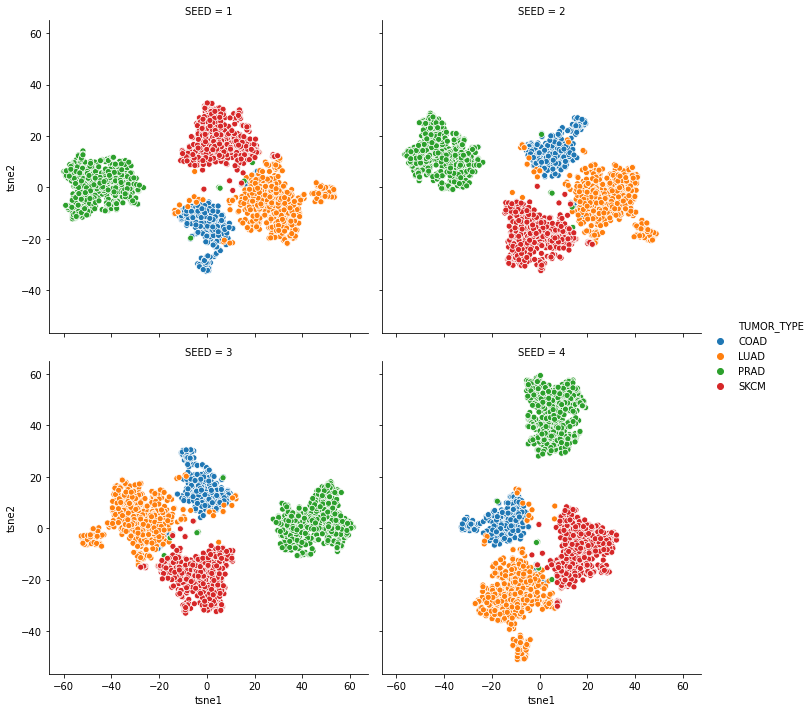

In [12]:
sns.relplot(x='tsne1', y='tsne2', data=tcga_data_tsne_all, hue = 'TUMOR_TYPE', col='SEED', col_wrap=2)

In [13]:
###########
# Process TCGA data
if False:
    TUMOR_TYPES = ['COAD', 'LUAD','PRAD','SKCM']
    tcga_data_list = []
    for TUMOR_TYPE in TUMOR_TYPES:
        this_df = pd.read_csv('../data/tcga_raw/' + TUMOR_TYPE + '.txt',sep='\t',engine='c')
        this_df = this_df.loc[:,this_df.iloc[0,]=='scaled_estimate'] #.transpose()
        this_df.columns = [x.replace(".1","_" + TUMOR_TYPE) for x in this_df.columns]
        #this_df['TUMOR_TYPE'] = TUMOR_TYPE
        tcga_data_list.append(this_df.iloc[1:,])

    tcga_data = pd.concat(tcga_data_list, axis=1)
    tcga_data = tcga_data.apply(pd.to_numeric)
    tcga_data.to_csv('../data/TCGA_rnaseqv2_Level3_RSEM_Genes.txt.gz', sep="\t", index=False, float_format='%.3e')
    #TUMOR_TYPE_LABELS = tcga_data['TUMOR_TYPE']
    #tcga_data.drop(columns=[0, 'TUMOR_TYPE'], inplace=True)





#tcga_data = np.log2(tcga_data + 1)